# Notebook for visualization of results

In [57]:
from experiments.experiment import *
import matplotlib.pyplot as plt
import numpy as np

results = Experiment.load_results()

Insert number of runs per experiment below and the number of years each run was executed for.

In [80]:
n_runs = 20
n_years = 50

Re-indexing the dataframe according to the replications and duration of runs.

In [81]:
x_time = np.arange(0, n_runs*n_years)
for i in range(len(x_time)):
    x_time[i] = x_time[i] % n_years

for experiment, runs in results.items():

    runs.index = x_time

Splitting the dataframes for plotting each run.

In [85]:
separated_results = {}

for experiment, runs in results.items():
    separated_results[experiment] = []
    for run in range(n_runs):
        run_df = runs.iloc[:n_years, :]
        runs = runs.iloc[n_years+1:, :]
        separated_results[experiment].append(run_df)

Generating the dataframe with experimental conditions to find the scenarios which correspond to the same lever combinations.

In [26]:
class Experiment:
    """
    The Experiment class wraps all features that relate to running an experiment and data collection.
    """

    def __init__(self, uncertainty_values=None, lever_values=None):
        #print('Setting up the experiment...\n')
        self.start_time = time.time()

        # Uncertainties
        if uncertainty_values is None:
            self.uncertainty_values = {
                'X1': [1.0, 1.001, 1.01],  # Annual increasing oil price
                'X2': [0.0, 0.001, 0.01],  # Annual probability for a global oil price shock
                'X3': [1.0, 1.001, 1.01],  # Annual increasing recycling efficiency
            }
        else:
            self.uncertainty_values = uncertainty_values

        # Levers
        if lever_values is None:
            self.lever_values = {
                'L1': [0.0, 0.2],  # minimum requirement for reused parts
                'L2': [0.0, 0.2],  # minimum requirement for high-quality recyclate
                'L3': [1.0, 1.2],  # better solvable cohesives
                'L4': [1.0, 1.2],  # externality for virgin plastic
                'L5': [0.0, 0.4],  # minimum requirement for recyclate
            }
        else:
            self.lever_values = lever_values

        self.experimental_conditions = self.prepare_experimental_conditions()

    def prepare_experimental_conditions(self):
        """
        Prepare experimental conditions by creating combinations of all uncertainty and lever values.
        :return:
            experimental_conditions: Dataframe (with column names being X1, ..., X3, L1, ..., L5
        """
        dictionary = {**self.uncertainty_values, **self.lever_values}
        columns = ['X1', 'X2', 'X3', 'L1', 'L2', 'L3', 'L4', 'L5']

        all_values = [dictionary[x] for x in columns]
        rows = list(itertools.product(*all_values))

        experimental_conditions = pd.DataFrame(data=rows, columns=columns)
        return experimental_conditions

In [27]:
experiment_test = Experiment()
experimental_conditions = experiment_test.prepare_experimental_conditions()

Setting up the experiment...



In [15]:
experimental_conditions.head()

,X1,X2,X3,L1,L2,L3,L4,L5
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.4
2,1.0,0.0,1.0,0.0,0.0,1.0,1.2,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.2,0.4
4,1.0,0.0,1.0,0.0,0.0,1.2,1.0,0.0


In [21]:
levers_df = experimental_conditions.iloc[:, 3:8]
print(len(levers_df))

864


In [150]:
unique_levers = levers_df.drop_duplicates()
unique_levers

,L1,L2,L3,L4,L5
0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.4
2,0.0,0.0,1.0,1.2,0.0
3,0.0,0.0,1.0,1.2,0.4
4,0.0,0.0,1.2,1.0,0.0
5,0.0,0.0,1.2,1.0,0.4
6,0.0,0.0,1.2,1.2,0.0
7,0.0,0.0,1.2,1.2,0.4
8,0.0,0.2,1.0,1.0,0.0
9,0.0,0.2,1.0,1.0,0.4


In [147]:
# TODO: add a new column to unique_levers telling which levers are on and then we can use it as a subplot title!
lever_descriptions = []

for index, row in unique_levers.iterrows():

    levers_on = []
    for column in unique_levers:

        if unique_levers.loc[index, column] != 1.0:

            if unique_levers.loc[index, column] != 0.0:

                levers_on.append(column)

    lever_description = ''
    for idx, lever in enumerate(levers_on):
        lever_description += lever + ', '

    if levers_on:
        lever_description += 'ON'

    else:
        lever_description = 'All OFF'
    #print(levers_on)
    #break

    lever_descriptions.append(lever_description)

In [159]:
unique_levers['Lever information'] = lever_descriptions
unique_levers.head()

C:\Users\rpvdp\AppData\Local\Temp/ipykernel_21552/2117899303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_levers['Lever information'] = lever_descriptions


,L1,L2,L3,L4,L5,Lever information
0,0.0,0.0,1.0,1.0,0.0,All OFF
1,0.0,0.0,1.0,1.0,0.4,"L5, ON"
2,0.0,0.0,1.0,1.2,0.0,"L4, ON"
3,0.0,0.0,1.0,1.2,0.4,"L4, L5, ON"
4,0.0,0.0,1.2,1.0,0.0,"L3, ON"


Making a dictionary with unique lever combinations and corresponding scenarios.

In [55]:
same_levers = {}

for i in range(len(unique_levers)):
    lever_combination_unique = unique_levers.iloc[i]
    same_levers[i] = []

    for j in range(len(levers_df)):
        lever_combination = levers_df.iloc[j]

        if lever_combination_unique.equals(other=lever_combination):
            same_levers[i].append(j)

Retrieving column names:

In [94]:
for experiment, runs in results.items():
    column_names =  list(runs.columns)[1:]
    print(column_names)
    break

['amount virgin', 'amount recyclate high', 'amount recyclate low', 'amount reused parts', 'amount standard parts', 'cars in garage', 'amount leakage', 'price virgin', 'price recyclate']


Making a dictionary with corresponding units.

In [106]:
unit_list = (['Kilogram'] * 3) + (['N'] * 3) + ['Kilogram'] + (['Euro'] * 2)

In [108]:
unit_dict = {column_names[i]: unit_list[i] for i in range(len(column_names))}

Visualizing results.

In [161]:
unique_levers.head()

,L1,L2,L3,L4,L5,Lever information
0,0.0,0.0,1.0,1.0,0.0,All OFF
1,0.0,0.0,1.0,1.0,0.4,"L5, ON"
2,0.0,0.0,1.0,1.2,0.0,"L4, ON"
3,0.0,0.0,1.0,1.2,0.4,"L4, L5, ON"
4,0.0,0.0,1.2,1.0,0.0,"L3, ON"


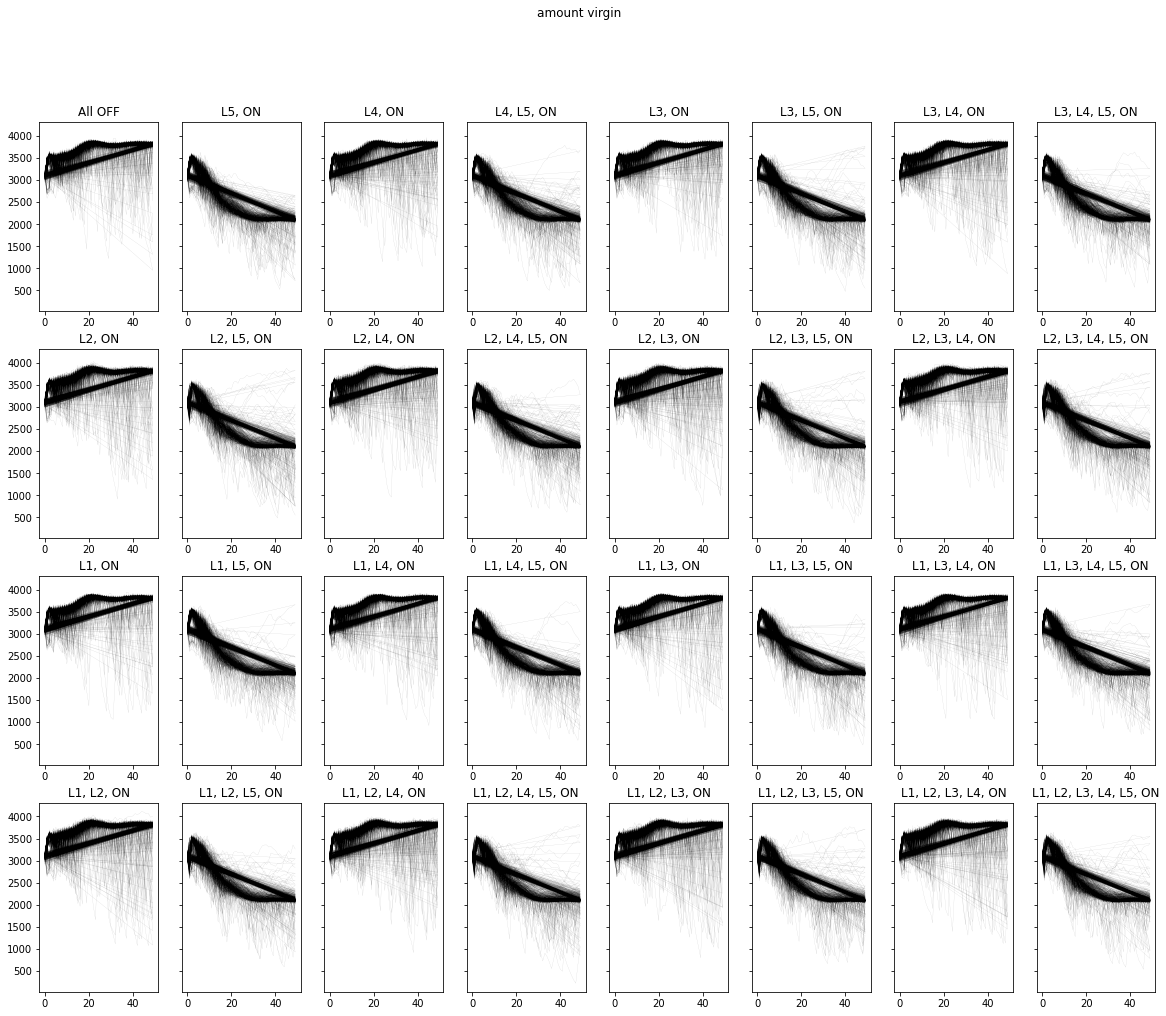

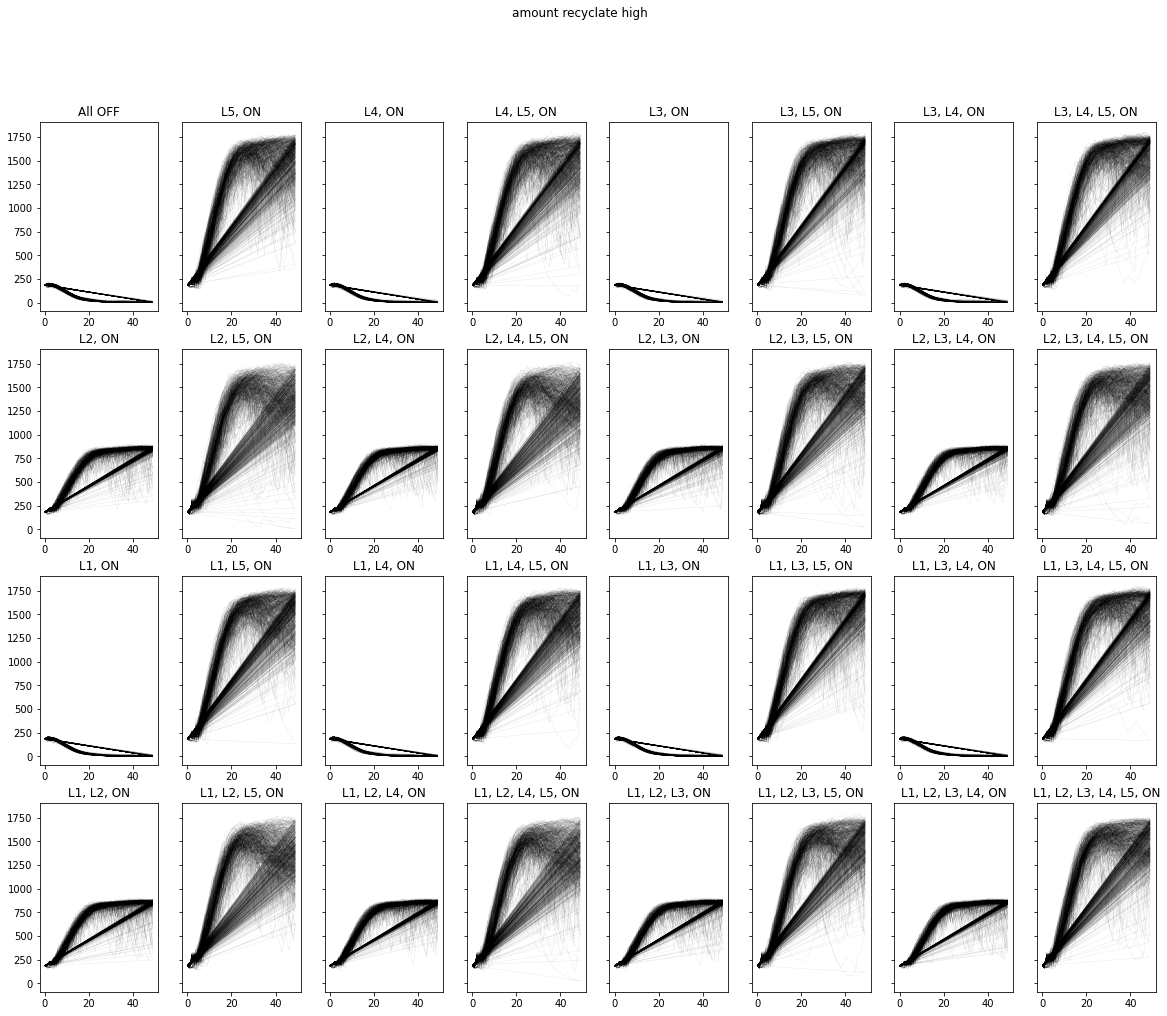

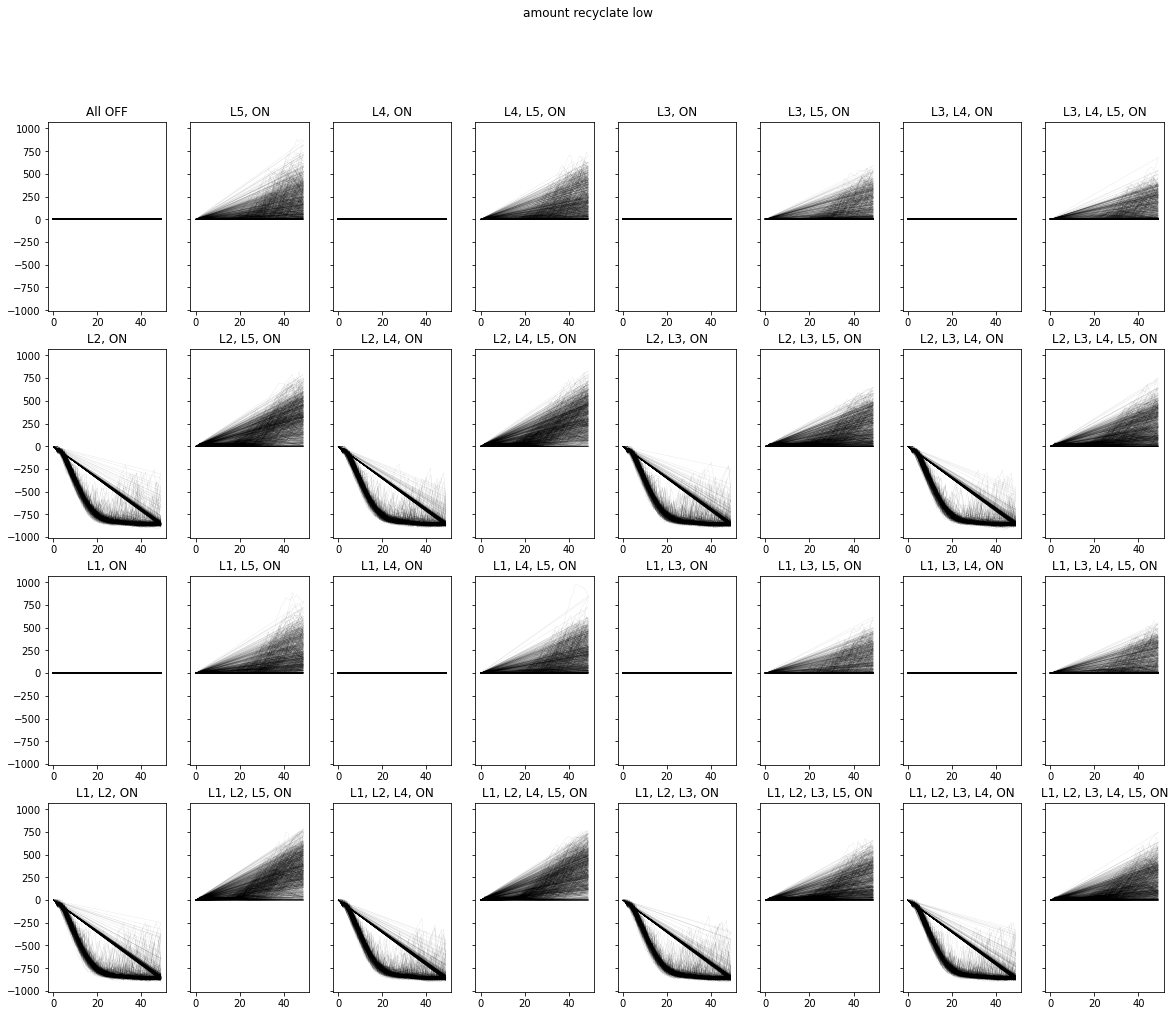

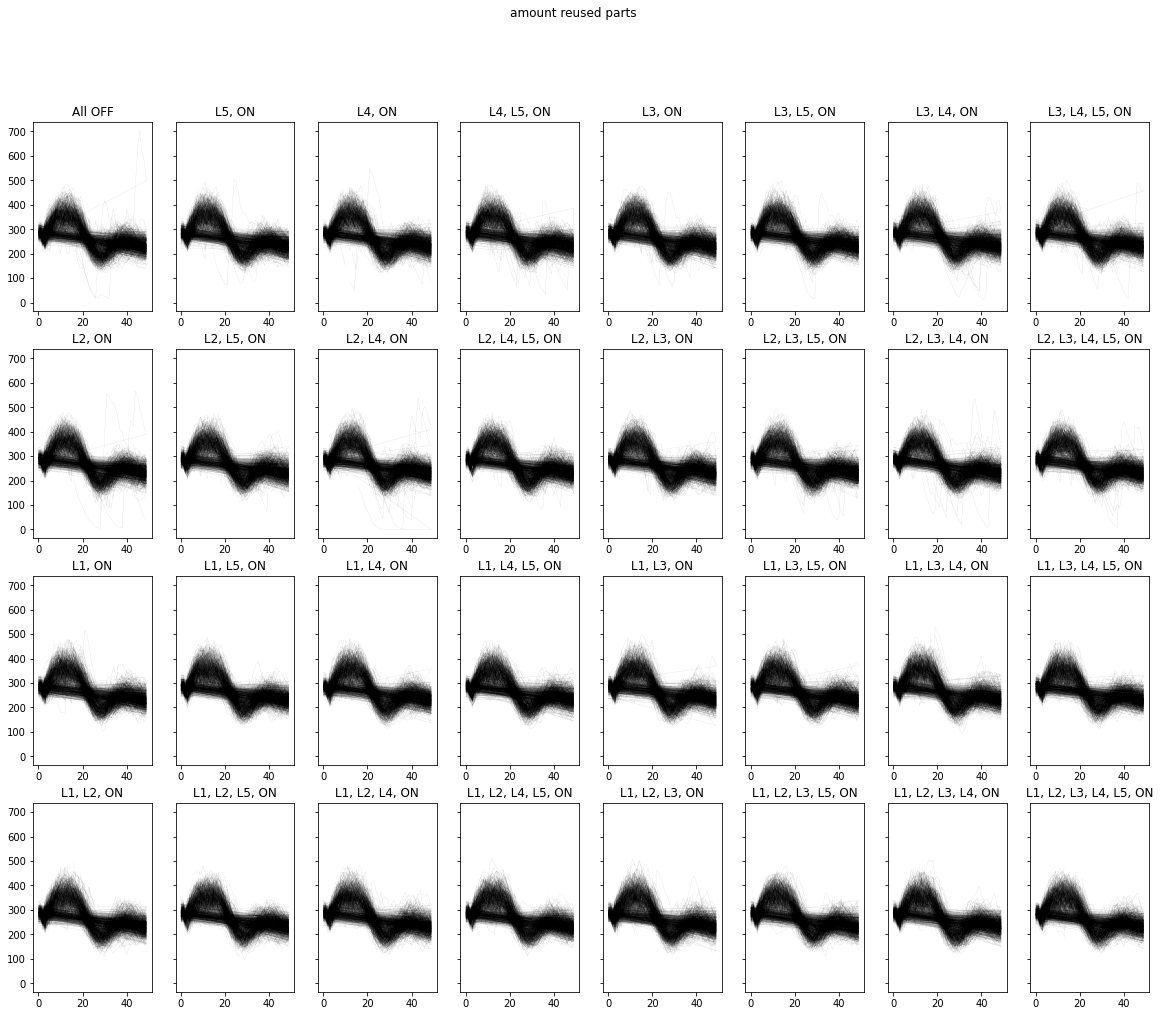

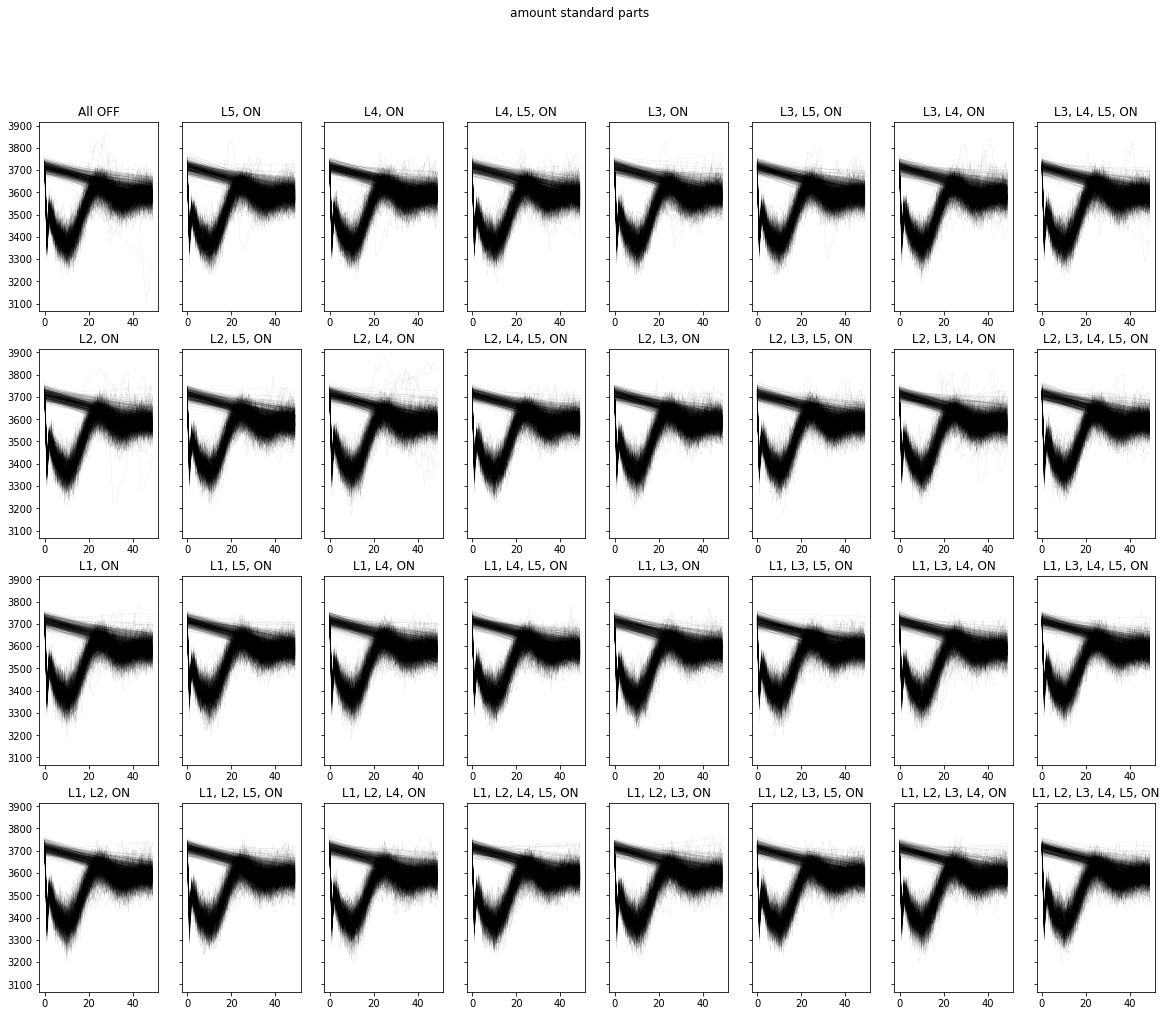

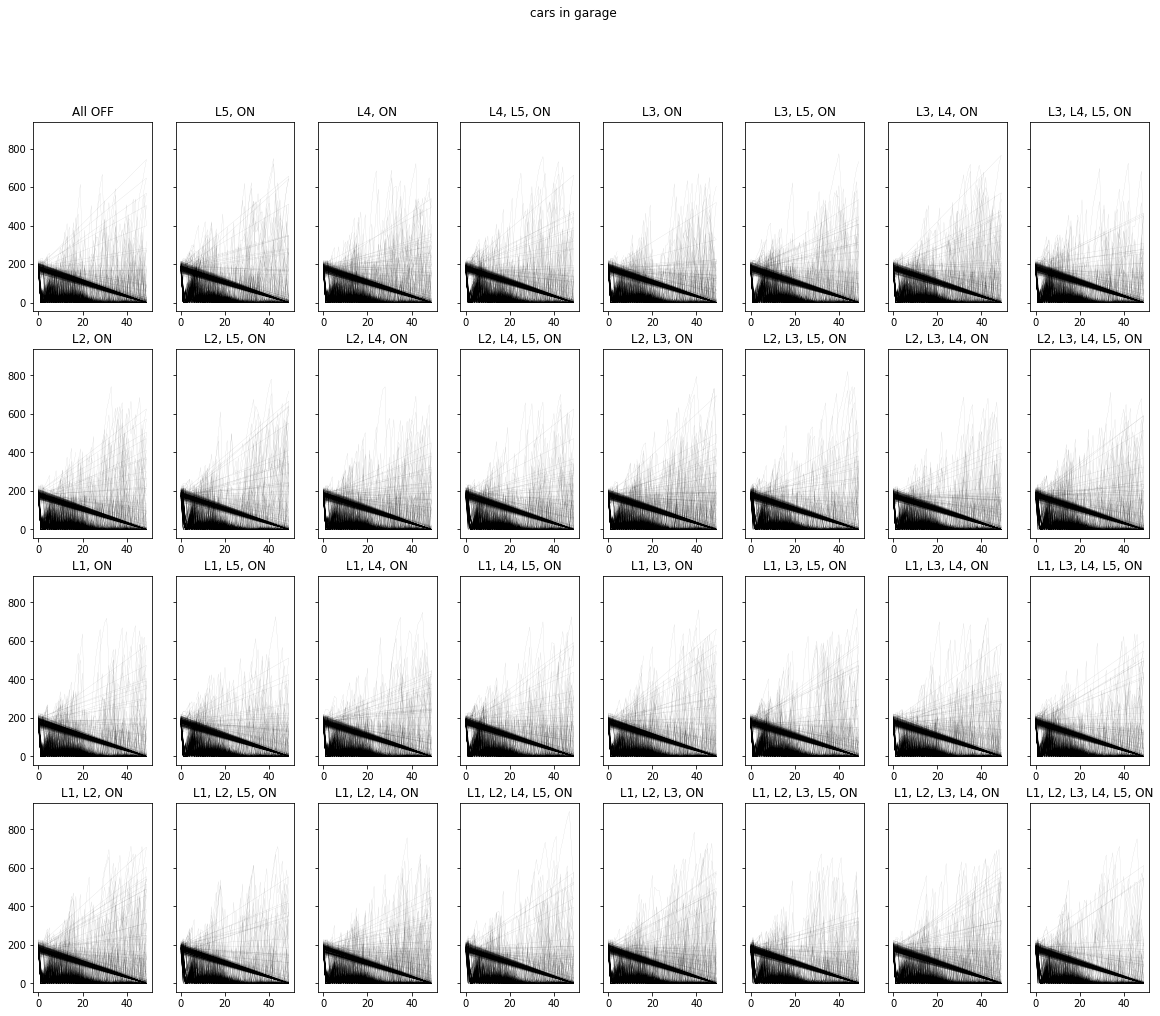

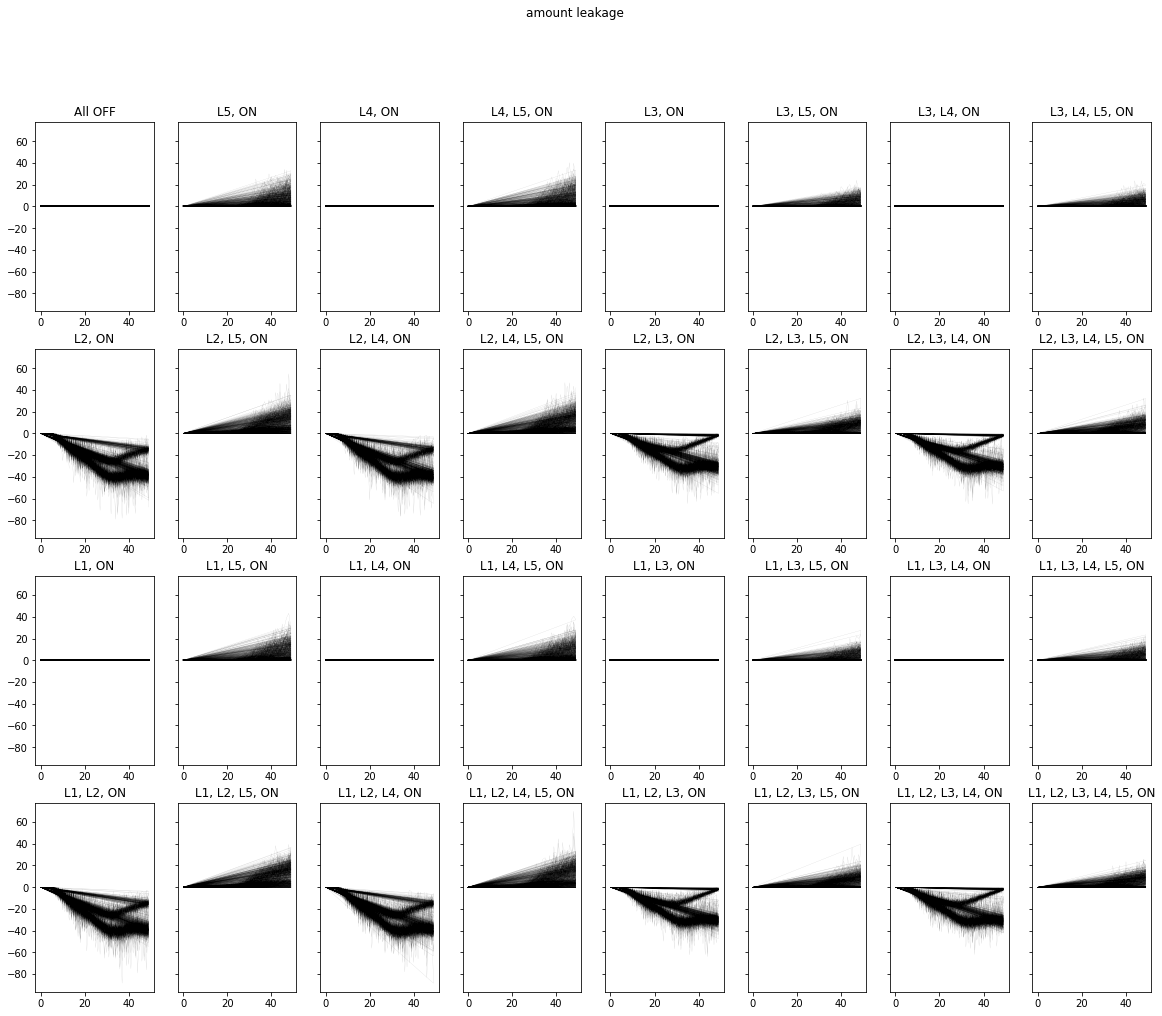

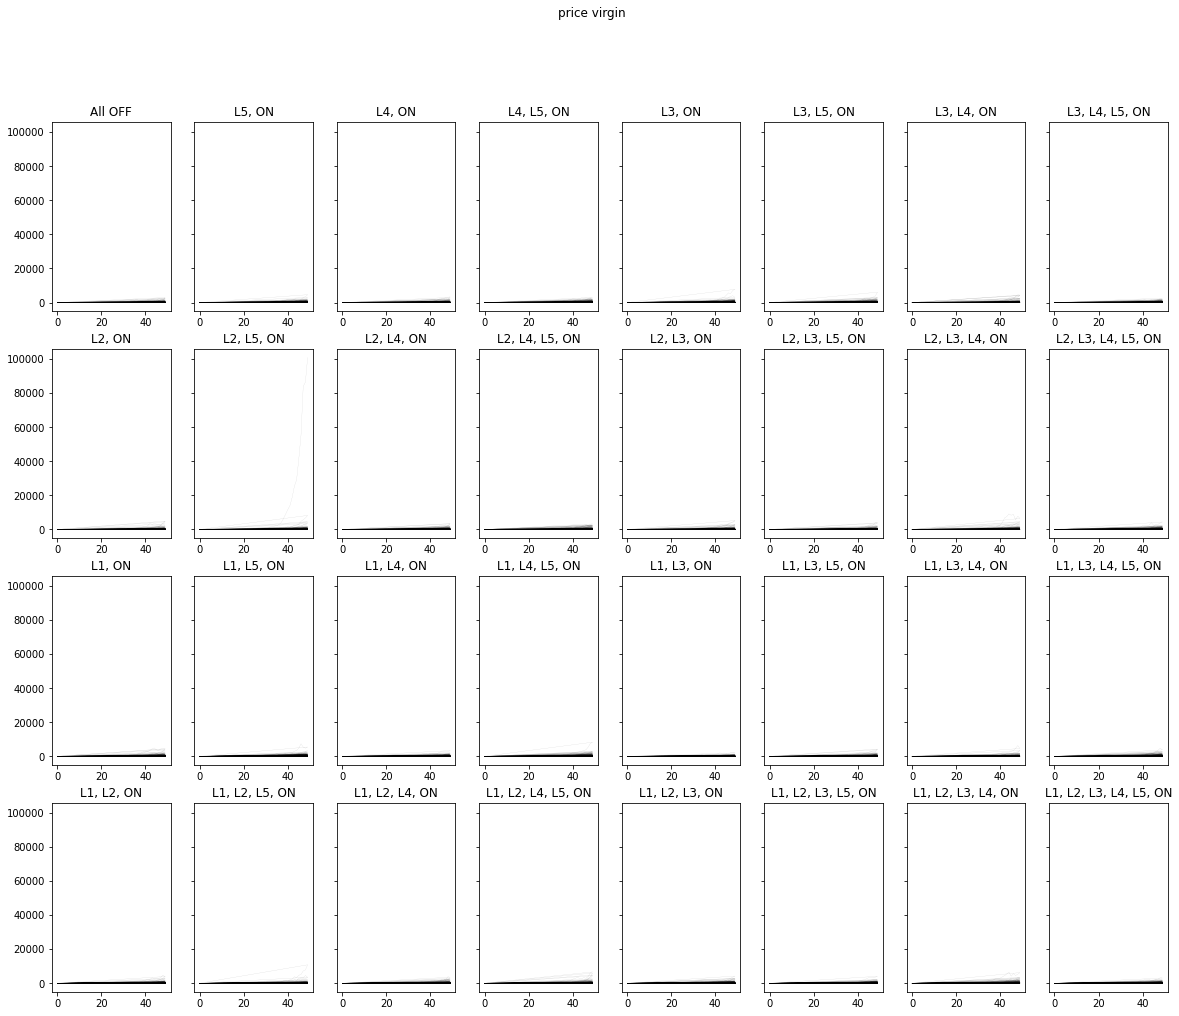

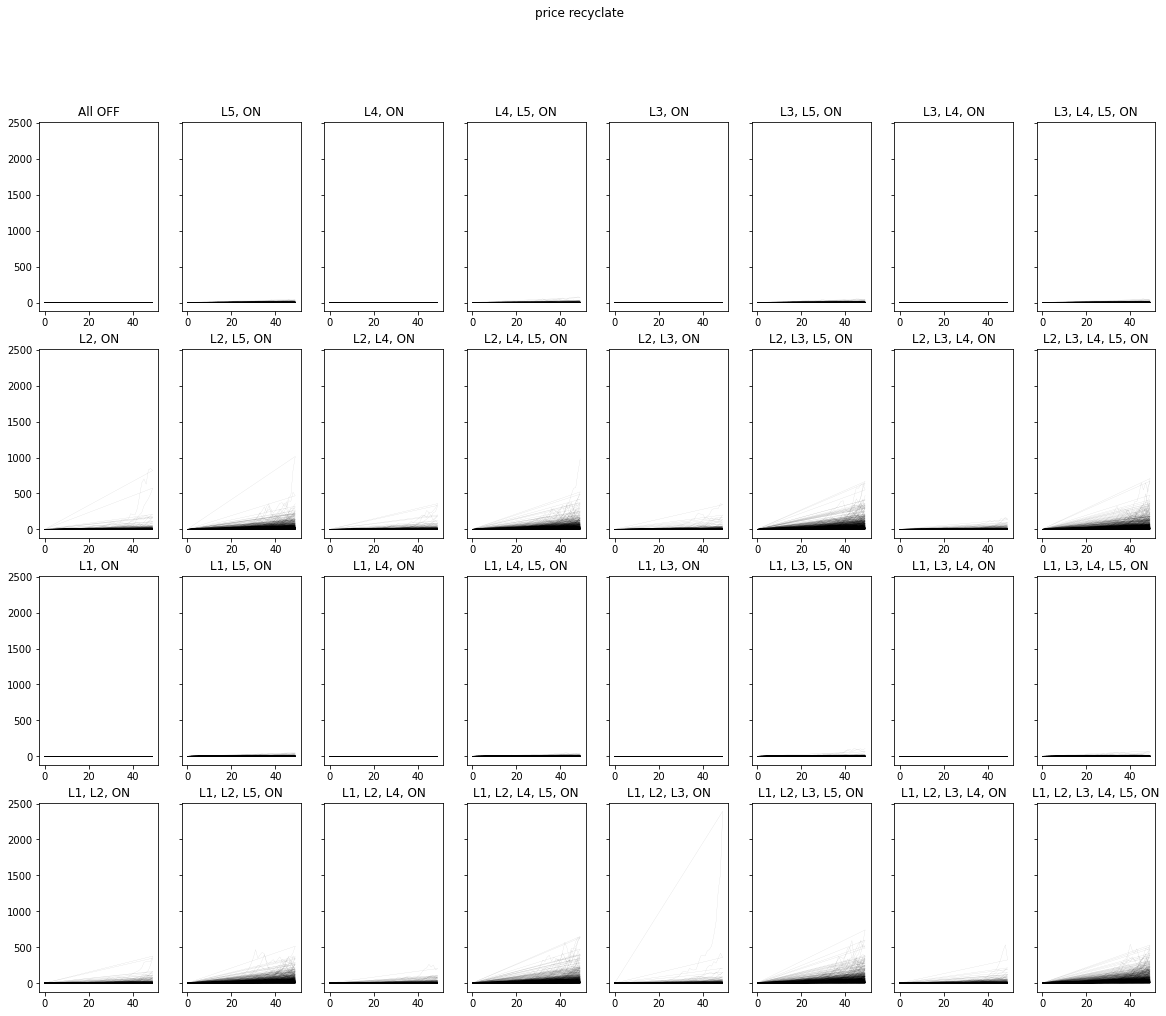

In [165]:
rows = 4
columns = 8

for column_name, unit in unit_dict.items():

    fig, axs = plt.subplots(rows, columns, sharey='all', figsize=(20, 16))
    fig.suptitle(column_name)
    #fig.xlabel('Year') # I DONT MANAGE TO SET THESE COMMON X AND Y LABELS FOR THE PLOTS
    #fig.ylabel(unit)
    # First iterate over the columns

    lever_combination_number = 0

    for row_nr in range(rows):
        # Then iterate over the rows
        for column_nr in range(columns):

            # Then see which experiments correspond to this lever combination and plot the N replications of each experiment in the graph
            corresponding_experiments = same_levers[lever_combination_number] # List of experiments

            for experiment_nr in corresponding_experiments:

                experiment_runs = separated_results[experiment_nr]
                # And now plot a line of each run in the experiment
                for run in experiment_runs:

                    axs[row_nr, column_nr].plot(run.index, run[column_name], color='black', linewidth=0.2, alpha=0.2)
                    axs[row_nr, column_nr].title.set_text(unique_levers.loc[lever_combination_number, 'Lever information'])

            lever_combination_number += 1